In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1 Select Data

In [2]:
cot_mod = pd.read_csv("..\\..\\Datos\\working\\cotizaciones_cleaned.csv",  encoding = "ISO-8859-1")
cot_all = pd.read_excel("..\\..\\Datos\\working\\cotizaciones_all.xlsx")
neg_all = pd.read_excel("..\\..\\Datos\\working\\negocios_all.xlsx")

C:\Users\joaquin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cot_mod.replace(['sin informacion'], np.nan, inplace=True)

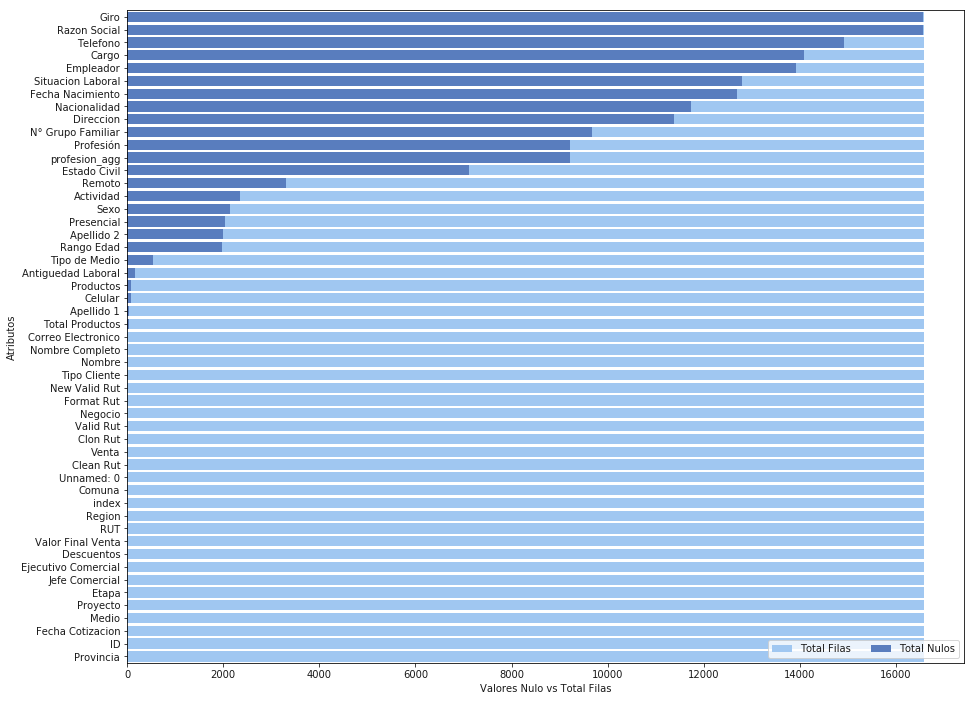

In [4]:
df = cot_mod.copy()
# df.replace([REPLACE_WITH], np.nan, inplace=True)
# df.replace(['Sin Información'], np.nan, inplace=True)

null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(15, 12))

sns.set_color_codes("pastel")
sns.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sns.set_color_codes("muted")
sns.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
plt.show()
# sb.despine(left=True, bottom=True)
# f.savefig("..\\results\\cot_all_attributes_clean.png")

## 3.1 Nuevos Atributos

### 3.1.1 Edad
Variable construida a partir de la fecha de nacimiento

In [5]:
# cot_all['Fecha Nacimiento'].plot()

In [6]:
# # Construir variable 'Edad' a partir de fecha de Nacimiento
# import datetime
# now = datetime.datetime.now().year

# fechas_nacimiento = pd.to_datetime(cot_all['Fecha Nacimiento']).apply(lambda x: x.date()).tolist()

# def anio_nac(x):
#     try:
#         year = int(x.year)
#         dif = now - year
#         if dif >= 18:
#             return dif
#         else:
#             return 0
#     except (ValueError,AttributeError):
#         return 0
        
#     return r

# edad = [anio_nac(x) for x in fechas_nacimiento]
# cot_mod['edad'] = edad

In [7]:
# print(cot_mod[cot_mod.edad == 0]['RUT'].count())
# cot_mod['edad'].nunique()

In [8]:
# cot_mod = cot_mod.drop(['Fecha Nacimiento'], axis=1)

### 3.1.2 Descuento
Variable que indica si el cliente recibio descuento

In [9]:
cot_mod['Descuentos'].shape[0]

16591

In [10]:
# cot_mod['Descuentos'].unique()

In [11]:
cot_mod.Descuentos.describe()

count    16591.000000
mean        23.492161
std         70.188265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2004.700000
Name: Descuentos, dtype: float64

In [12]:
# Construir 'descuento': binario : [True, False]
descuento = cot_mod['Descuentos'].tolist()


def is_desc(x):
    try:
        desc = int(x)
        if desc > 0:
            return True
        else:
            return False
    except ValueError:
        return False

# descuento = [is_desc(x) for x in recibio_descuento]

cot_mod['descuento'] = descuento
cot_mod['recibio_descuento'] = cot_mod['Descuentos'] > 0
# descuento

### 3.1.3.Cantidad de Productos

In [13]:
# Construir 'productos': categorico : ['depto','casa','estacionamiento','bodega','Estudio']
productos = cot_mod['Productos'].tolist()
depto = []; estacionamiento=[]; bodega = []; estudio = [];nan = 0

def get_products(x,word,numeric=False):
    w=0
    try:
        p =str(x)
        arr_p = x.split(',')
        for e in arr_p:
            if word in e:
                w+=1
#                 print(word + " :",e)
                break
            elif numeric and ('B' not in e or 'Est' not in e):
                try:
                    int(e)
#                     print(word + " :",e)
                    w+=1
                except ValueError:
                    pass
        return w
    except (ValueError,AttributeError):
        try:
            int(x)
            if numeric:
                return 1
            else:
                return 0
        except ValueError:
            return 0

cot_mod['#vivienda'] = [get_products(x,'T',numeric=True) for x in productos]
cot_mod['#bodega'] = [get_products(x,'Bod') for x in productos]
cot_mod['#estacionamiento'] = [get_products(x,'Est') for x in productos]
cot_mod['#estudio'] = [get_products(x,'Estudio') for x in productos]
cot_mod['#lan'] = [get_products(x,'lan') for x in productos]

In [14]:
print(cot_mod[['Productos','#vivienda','#bodega','#estacionamiento','#estudio','#lan']].head())
print(cot_mod[['Productos','#vivienda','#bodega','#estacionamiento','#estudio','#lan']].tail())

              Productos  #vivienda  #bodega  #estacionamiento  #estudio  #lan
0         TB-104,Est-65          1        0                 1         0     0
1  TA-302,Est-41,Bod-02          1        1                 1         0     0
2         TA-303,Est-01          1        0                 1         0     0
3  TA-302,Est-41,Bod-06          1        1                 1         0     0
4         TA-604,Est-01          1        0                 1         0     0
         Productos  #vivienda  #bodega  #estacionamiento  #estudio  #lan
16586  703,Est-003          1        0                 1         0     0
16587          912          1        0                 0         0     0
16588  Est-002,703          1        0                 1         0     0
16589  912,Est-002          1        0                 1         0     0
16590          912          1        0                 0         0     0


In [15]:
cot_mod = cot_mod.drop(['Productos'], axis=1)

### 3.1.4 Latitud y Longitud

In [16]:
from geopy.geocoders import Nominatim

def get_latlong(direccion):
    geolocator = Nominatim()
    direccion = "TUCAPEL 937 , CONCEPCION CENTRO"
    location = geolocator.geocode(direccion)
#     print(location.address)
    # Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
    print((location.latitude, location.longitude))
    # (40.7410861, -73.9896297241625)
#     print(location.raw)

# get_latlong('')

# cot_mod['loc_lat'] = []

### 3.1.6 Region

In [17]:
cot_mod.columns

Index(['Unnamed: 0', 'index', 'ID', 'Fecha Cotizacion', 'Medio',
       'Tipo de Medio', 'Proyecto', 'Etapa', 'Presencial', 'Remoto',
       'Jefe Comercial', 'Ejecutivo Comercial', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión', 'Negocio', 'Venta', 'Clon Rut',
       'Clean Rut', 'Valid Rut', 'New Valid Rut', 'Format Rut',
       'profesion_agg', 'descuento', 'recibio_descuento', '#vivienda',
       '#bodega', '#estacionamiento', '#estudio', '#lan'],
      dtype='object')

In [18]:
cot_mod['Region'].unique()

array(['VIII Región del Bío-Bío', 'XIII Región Metropolitana de Santiago',
       'VII Región del Maule', 'II Región de Antofagasta',
       'IV Región de Coquimbo', 'X Región de Los Lagos',
       'XII Región de Magallanes y de La Antártica Chilena',
       'V Región de Valparaíso',
       'VI Región del Libertador General Bernardo O Higgins',
       'XIV Región de Los Ríos',
       'XI Región de Aysen del General Carlos Ibáñez del Campo',
       'I Región de Tarapacá', 'IX Región de La Araucanía',
       'III Región de Atacama', 'XV Region de Arica y Parinacota'],
      dtype=object)

In [19]:
cot_mod['region'] = cot_mod['Region']
cot_mod['region'] = cot_mod['region'].replace(
    {'VIII Región del Bío-Bío':'Bio-Bio',
     'XIII Región Metropolitana de Santiago':'Metropolitana'}
)
cot_mod['region'] = cot_mod['region'].replace(
    ['II Región de Antofagasta',
       'IV Región de Coquimbo', 'VII Región del Maule',
       'X Región de Los Lagos',
       'V Región de Valparaíso',
       'VI Región del Libertador General Bernardo O Higgins',
       'XIV Región de Los Ríos',
       'XI Región de Aysen del General Carlos Ibáñez del Campo',
       'I Región de Tarapacá', 'IX Región de La Araucanía',
       'XII Región de Magallanes y de La Antártica Chilena',
       'XV Region de Arica y Parinacota', 'III Región de Atacama'],'Otro'
)

In [20]:
cot_mod['region'] = cot_mod['region'].astype('category')
cot_mod['region'].head()

0    Bio-Bio
1    Bio-Bio
2    Bio-Bio
3    Bio-Bio
4    Bio-Bio
Name: region, dtype: category
Categories (3, object): [Bio-Bio, Metropolitana, Otro]

In [21]:
cot_mod = cot_mod.drop(['Region'], axis=1)

### 3.1.7 Provincia
Esta variable indica si el cliente facilito el correo en alguna cotizacion

In [22]:
cot_all['Provincia'].unique()

array(['Concepción', 'Ñuble', 'Santiago', 'Talca', 'Biobío', 'Maipo',
       'Antofagasta', 'Limarí', 'Llanquihue', 'Magallanes', 'El Loa',
       'Isla de Pascua', 'Valparaíso', 'Cachapoal', 'Arauco',
       'Cordillera', 'Valdivia', 'Coyhaique', 'Linares', 'Osorno',
       'San Felipe de Aconcagua', 'Iquique', 'Cautín', 'Capitán Prat',
       'Aysén', 'Chacabuco', 'Copiapó', 'Melipilla', 'Malleco', 'Arica',
       'Elqui', 'Cauquenes', 'Colchagua', 'Última Esperanza', 'Curicó',
       'Chiloé', 'Choapa', 'Huasco'], dtype=object)

In [23]:
cot_mod['provincia'] = cot_mod['Provincia'].copy()
cot_mod['provincia'] = cot_mod['provincia'].replace(
    {'Concepción':'Concepcion',
     'Santiago':'Santiago'}
)
cot_mod['provincia'] = cot_mod['provincia'].replace(
    ['Antofagasta', 'Limarí', 'Talca', 'Biobío', 'Ñuble',
       'Llanquihue','Maipo', 'Valparaíso', 'Cachapoal',
       'Arauco', 'Valdivia', 'Coyhaique', 'Linares', 'Osorno',
       'San Felipe de Aconcagua', 'Iquique', 'Cautín', 'Capitán Prat',
       'Aysén', 'Chacabuco', 'Melipilla', 'Magallanes', 'Malleco',
       'Arica ', 'Elqui', 'El Loa', 'Cauquenes', 'Colchagua', 'Valdivia ',
       'Copiapó', 'Última Esperanza', 'Cordillera', 'Curicó', 'Chiloé',
       'Choapa', 'Huasco','Arica','Isla de Pascua'],'Otro'
)

In [24]:
cot_mod['provincia'] = cot_mod['provincia'].astype('category')
cot_mod['provincia'].head()

0    Concepcion
1    Concepcion
2    Concepcion
3    Concepcion
4          Otro
Name: provincia, dtype: category
Categories (3, object): [Concepcion, Otro, Santiago]

In [25]:
cot_mod = cot_mod.drop(['Provincia'], axis=1)

### 3.1.8 Comuna
Esta variable indica si el cliente facilito el correo en alguna cotizacion

In [26]:
cot_all['Comuna'].unique()

array(['Concepción', 'Chillán', 'San Pedro de la Paz', 'Talcahuano',
       'La Florida', 'Hualpén', 'Santiago', 'Constitución', 'Los Ángeles',
       'Ñuñoa', 'Providencia', 'Penco', 'Tomé', 'Buin', 'Antofagasta',
       'Ovalle', 'Puerto Montt', 'Punta Arenas', 'Chiguayante',
       'El Bosque', 'Yungay', 'Florida', 'Calama', 'Lota', 'Coronel',
       'Isla de Pascua', 'Viña del Mar', 'Machalí', 'Arauco',
       'Las Condes', 'Vitacura', 'Pirque', 'Contulmo', 'Concón',
       'Santa Juana', 'Puerto Varas', 'Cañete', 'Huechuraba', 'Valdivia',
       'Coyhaique', 'Colbún', 'Osorno', 'San Felipe', 'Iquique',
       'Rancagua', 'Temuco', 'Cochrane', 'Chillán Viejo', 'Maipú',
       'Aysén', 'Villarrica', 'La Reina', 'Peñalolén', 'Estación Central',
       'Colina', 'Quilicura', 'Curanilahue', 'Copiapó', 'Algarrobo',
       'Talca', 'San Carlos', 'Mulchén', 'Coelemu', 'Angol', 'Laja',
       'Nacimiento', 'Arica', 'La Serena', 'Hualqui', 'San Miguel',
       'Pelluhue', 'Quillón', 'Valpar

In [27]:
cot_mod['comuna'] = cot_mod['Comuna'].copy()

cot_mod['comuna'] = cot_mod['comuna'].replace(
    ['Ovalle', 'Constitución','Tomé', 'Chillán','Yungay',
     'Puerto Montt', 'Santiago', 'El Bosque', 'La Florida','Las Condes',
     'Ñuñoa', 'Providencia', 'Buin','Florida','Viña del Mar',
     'Machalí', 'Vitacura', 'Arauco', 'Contulmo', 'Concón',
     'Santa Juana', 'Puerto Varas', 'Cañete', 'Huechuraba', 'Valdivia',
     'Coyhaique', 'Colbún', 'Osorno', 'San Felipe', 'Iquique',
     'Rancagua', 'Lota', 'Temuco', 'Cochrane', 'Chillán Viejo', 'Maipú',
     'Aysén', 'Villarrica', 'La Reina', 'Peñalolén', 'Estación Central',
     'Colina', 'Quilicura', 'Curanilahue', 'Algarrobo', 'Talca',
     'San Carlos', 'Punta Arenas', 'Mulchén', 'Coelemu', 'Angol',
     'Laja', 'Nacimiento', 'Arica', 'La Serena', 'Hualqui',
     'San Miguel', 'Calama', 'Pelluhue', 'Quillón', 'Valparaíso',
     'Llanquihue', 'Los Álamos', 'Renca', 'Santa Cruz', 'Panguipulli',
     'Cabrero', 'Cerrillos', 'Pudahuel', 'Copiapó', 'Natales', 'Tirúa',
     'Cauquenes', 'La Cisterna', 'Yumbel', 'Ránquil', 'Padre Las Casas',
     'Las Cabras', 'Coquimbo', 'Lebu', 'San José de Maipo', 'San Ramón',
     'Curicó', 'Independencia', 'Lampa ', 'Castro', 'Punitaqui',
     'Conchalí', 'San Rosendo', 'Alto Hospicio', 'Illapel', 'Huasco',
     'Collipulli', 'Tucapel', 'Alto Biobío','Pirque','Lampa','Isla de Pascua','Antofagasta', 'Arica'],'Otro'
)

In [28]:
cot_mod['comuna'] = cot_mod['comuna'].astype('category')
cot_mod['comuna'].head()

0    Concepción
1    Concepción
2    Concepción
3    Concepción
4          Otro
Name: comuna, dtype: category
Categories (9, object): [Chiguayante, Concepción, Coronel, Hualpén, ..., Otro, Penco, San Pedro de la Paz, Talcahuano]

In [29]:
cot_mod = cot_mod.drop(['Comuna'], axis=1)

### 3.1.9 Atributos Provistos


In [30]:
cot_mod['is_nombre'] = ~cot_mod['Nombre'].isnull()
cot_mod['is_apellido1'] = ~cot_mod['Apellido 1'].isnull()
cot_mod['is_apellido2'] = ~cot_mod['Apellido 2'].isnull()
cot_mod['is_nombrecompleto'] = ~cot_mod['Nombre Completo'].isnull()
cot_mod['is_correo'] = ~cot_mod['Correo Electronico'].isnull()
cot_mod['is_direccion'] = ~cot_mod['Direccion'].isnull()
cot_mod['is_telefono'] = ~cot_mod['Telefono'].isnull()
cot_mod['is_actividad'] = ~cot_mod['Actividad'].isnull()
cot_mod['is_estado_civil'] = ~cot_mod['Estado Civil'].isnull()
cot_mod['is_fnac'] = ~cot_mod['Fecha Nacimiento'].isnull()
cot_mod['is_celular'] = ~cot_mod['Celular'].isnull()

cot_mod['is_profesion'] = ~cot_mod['profesion_agg'].isnull()

cot_mod = cot_mod.drop(['Profesión','Telefono','Correo Electronico','Telefono','Nombre','Apellido 1','Apellido 2','Nombre Completo'], axis=1)

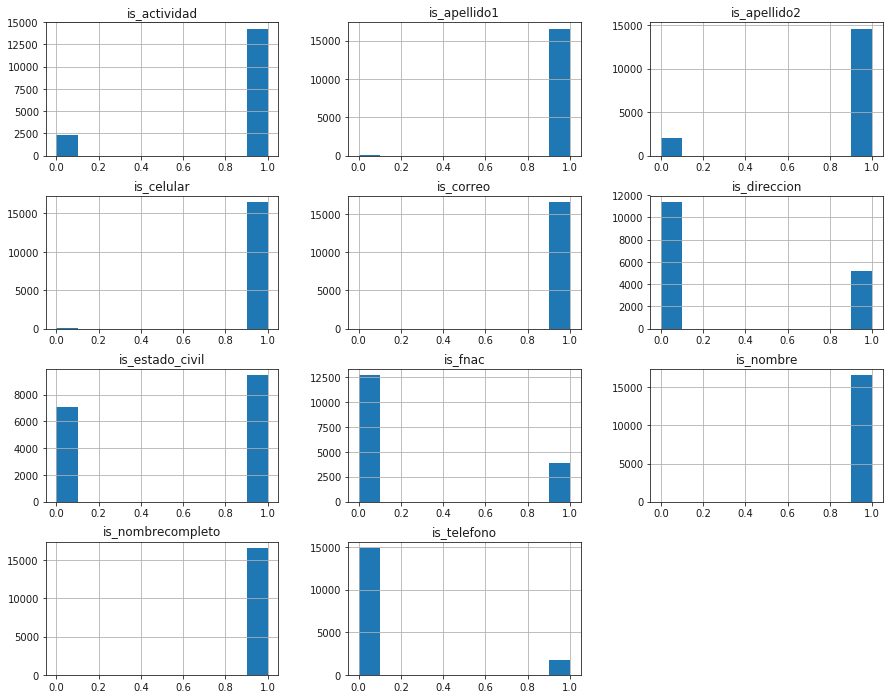

In [31]:
arr = ['is_nombre', 'is_apellido1', 'is_apellido2', 'is_nombrecompleto', 
       'is_correo', 'is_direccion', 'is_telefono', 'is_actividad', 'is_estado_civil',
        'is_fnac', 'is_celular']

cot_mod[arr].hist(figsize=(15,12))
plt.show()

### 3.1.9 Atributos Provistos
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

### 3.1.4 Cotizaciones por Proyecto

In [32]:
rut_dict = dict()

    
for index, row in cot_mod.iterrows():
    rut = row['Format Rut']
    pr = row['Proyecto']
    
    if rut not in rut_dict.keys():
        rut_dict[rut] = dict()
        rut_dict[rut]['Altos del Valle'] = 0
        rut_dict[rut]['Edificio Urban 1470'] = 0
        rut_dict[rut]['San Andres Del Valle'] = 0
        rut_dict[rut]['Edificio Mil610'] = 0
        rut_dict[rut]['Edificio Junge'] = 0
    
    rut_dict[rut][pr] +=1



rut_proyectos = pd.DataFrame.from_dict(rut_dict,orient='index').reset_index()
rut_proyectos.head()

# cot_mod = pd.merge(cot_mod_cp, rut_proyectos,how='left', left_on='Format Rut', right_on='index')

,index,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,000.000.000-0,0,1,1,0,0
1,1.462.558-5,0,0,0,1,0
2,10.000.513-1,0,0,0,0,2
3,10.000.522-0,0,0,0,0,2
4,10.005.853-7,0,0,0,0,2


In [33]:
cot_mod.columns

Index(['Unnamed: 0', 'index', 'ID', 'Fecha Cotizacion', 'Medio',
       'Tipo de Medio', 'Proyecto', 'Etapa', 'Presencial', 'Remoto',
       'Jefe Comercial', 'Ejecutivo Comercial', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'RUT', 'Celular', 'Direccion',
       'Sexo', 'Estado Civil', 'Rango Edad', 'Fecha Nacimiento',
       'Tipo Cliente', 'Razon Social', 'Giro', 'Nacionalidad',
       'N° Grupo Familiar', 'Actividad', 'Cargo', 'Situacion Laboral',
       'Empleador', 'Antiguedad Laboral', 'Negocio', 'Venta', 'Clon Rut',
       'Clean Rut', 'Valid Rut', 'New Valid Rut', 'Format Rut',
       'profesion_agg', 'descuento', 'recibio_descuento', '#vivienda',
       '#bodega', '#estacionamiento', '#estudio', '#lan', 'region',
       'provincia', 'comuna', 'is_nombre', 'is_apellido1', 'is_apellido2',
       'is_nombrecompleto', 'is_correo', 'is_direccion', 'is_telefono',
       'is_actividad', 'is_estado_civil', 'is_fnac', 'is_celular',
       'is_profesion'],
      dtype=

### 3.1.9 Rango Edad
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

In [34]:
### Ver edades en cotizantes y cotizantes que llegan a negocios
rango_edad = cot_mod['Rango Edad'].tolist()
rango_edad_min = [];rango_edad_max = []

for e in rango_edad:
    try:
        edad = e.split('-')
        rango_edad_min.append(int(edad[0]))
        rango_edad_max.append(int(edad[1]))
    except (ValueError, AttributeError):
        rango_edad_min.append(0)
        rango_edad_max.append(0)
        
cot_mod['Edad Min'] = rango_edad_min
cot_mod['Edad Max'] = rango_edad_max

### 3.1.11 Negocio
Indica si el cliente siguio el proceso de cotizacion y lo transformo en un proceso de negocio

In [35]:
# ruts de los clientes en negocio
neg_ids = neg_all['ID Cotizacion'].unique().tolist()

# cot_neg = cot_all.copy()
cot_mod['Negocio'] = cot_mod['ID'].isin(neg_ids)
cot_mod[cot_mod['Negocio'] == True].shape

(2335, 64)

### 3.1.11 Venta
Indica si el cliente siguio el proceso de negocio y lo transformo en un proceso de venta

In [36]:
# Venta Sesgadores
personas_ventas = dict()
total_ventas = 0
search = ['Escriturado', 'Entregado']

for group, frame in neg_all.groupby('RUT'):
    compras_persona = 0
    for id_cot in frame['Estado'].tolist():
        if search[0] == id_cot or search[1] == id_cot:
            compras_persona += 1
#             print(group, id_cot)
            if group not in personas_ventas.keys():
                personas_ventas[group] = dict()
            personas_ventas[group]['compro'] = True
            total_ventas += 1
            personas_ventas[group]['total'] = compras_persona
    print()

        
            
print('filas negocios', neg_all.shape[0])
print('filas ventas', total_ventas)
print('personas que hicieron negocio', neg_all.RUT.nunique())
print('personas que compraron',len(personas_ventas))

In [37]:
neg_all[(neg_all.Estado == 'Escriturado') | (neg_all.Estado == 'Entregado')]['ID Cotizacion'].tolist()

[79631,
 79655,
 80512,
 86617,
 88781,
 91954,
 95799,
 97220,
 97688,
 100164,
 100210,
 107339,
 108138,
 109361,
 110345,
 114131,
 115503,
 116397,
 118512,
 122348,
 124791,
 125947,
 128061,
 131906,
 132930,
 132944,
 132947,
 97424,
 98240,
 98902,
 100809,
 102297,
 102788,
 102897,
 103237,
 103809,
 104320,
 104530,
 108331,
 111266,
 111783,
 114095,
 116756,
 118353,
 119073,
 119515,
 121646,
 125999,
 126767,
 127381,
 127707,
 128022,
 129122,
 129232,
 131745,
 132978,
 30892,
 30894,
 30895,
 30897,
 30898,
 30899,
 30900,
 30901,
 30902,
 30904,
 30905,
 30906,
 30870,
 30907,
 30909,
 31095,
 31096,
 31374,
 32239,
 32279,
 32377,
 33203,
 34203,
 35640,
 35910,
 36220,
 36310,
 36370,
 36676,
 37255,
 37282,
 37348,
 37829,
 37930,
 38892,
 39238,
 39340,
 40752,
 41224,
 41592,
 42511,
 44025,
 47048,
 47579,
 47703,
 47731,
 48594,
 49532,
 50849,
 51190,
 51665,
 51760,
 51773,
 51814,
 51912,
 51972,
 52148,
 53291,
 53388,
 53631,
 53784,
 54103,
 54784,
 550

In [38]:
print(len(personas_ventas.keys()))
for key, value in personas_ventas.items():
    print(key, value)
    if value['total'] > 1:
        pass
#         print(key, value['total'])

288
10000522-0 {'compro': True, 'total': 1}
10034279-0 {'compro': True, 'total': 1}
10168822-4 {'compro': True, 'total': 1}
10184906-6 {'compro': True, 'total': 1}
10312153-1 {'compro': True, 'total': 1}
10352115-7 {'compro': True, 'total': 1}
10424643-5 {'compro': True, 'total': 1}
10481733-5 {'compro': True, 'total': 1}
10592310-4 {'compro': True, 'total': 1}
10623814-6 {'compro': True, 'total': 1}
10656826-k {'compro': True, 'total': 1}
10676443-3 {'compro': True, 'total': 1}
10686979-0 {'compro': True, 'total': 1}
10748815-4 {'compro': True, 'total': 1}
10791004-2 {'compro': True, 'total': 1}
10842892-9 {'compro': True, 'total': 1}
10931624-5 {'compro': True, 'total': 1}
11212784-4 {'compro': True, 'total': 1}
11494360-6 {'compro': True, 'total': 1}
11572060-0 {'compro': True, 'total': 1}
11583365-0 {'compro': True, 'total': 1}
11790408-3 {'compro': True, 'total': 1}
11898429-3 {'compro': True, 'total': 1}
11900777-1 {'compro': True, 'total': 1}
11962764-8 {'compro': True, 'total':

In [39]:
# ruts de los clientes en negocio
mask = (neg_all.Estado == 'Escriturado') | (neg_all.Estado == 'Entregado')
entregado_n_escriturado = neg_all[mask]['ID Cotizacion'].tolist()
# neg_ids = neg_all['ID Cotizacion'].unique().tolist()

# cot_neg = cot_all.copy()
cot_mod['Compra'] = cot_mod['ID'].isin(entregado_n_escriturado)
cot_mod[cot_mod['Compra'] == True].shape

(291, 65)

### 3.1.12 N° Grupo Familiar


In [40]:
cot_mod['N° Grupo Familiar']=cot_mod['N° Grupo Familiar'].fillna('Sin Información')

In [41]:
def is_nrofam(x):
    if x == 'Sin Información':
        return False
    else:
        return True

cot_mod['is_nrofam'] = [ is_nrofam(x) for x in cot_mod['N° Grupo Familiar'] ]

In [42]:
cot_mod.to_excel('..\\..\\Datos\\working\\cotizaciones_transformed.xlsx')

### 3.1.12 N° Grupo Familiar


### 3.2. Extraccion de Datos
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

In [43]:
#View data integration
iterator = 0
for group, frame in  cot_mod.groupby('Clean Rut'):
    pass
#     print(frame['Actividad'])
    #Check , debe ir a data exploration
    
#     if len(frame['Actividad'].unique()) > 1:
#         print(group, frame['Negocio'])
#     for i in range(0, len(frame['Medio'])):
        
#         if frame['Presencial'].iloc[i] == frame['Remoto'].iloc[i]:
#             print(group)
#             print(
#                 frame['Proyecto'].iloc[i],
#                 frame['Medio'].iloc[i], 
#                 frame['Presencial'].iloc[i], 
#                 frame['Remoto'].iloc[i], 
#                 frame['Negocio'].iloc[i]
#             )
#             iterator +=1
        
    
#     arr = frame['Medio'].unique()
#     l = len(arr)
#     if l > 1:
#         if True in arr: 
#             iterator +=1
#             print(group)
#         print(l)

print(iterator)

0


In [44]:
cot_mod.iloc[[3601, 14926]]

,Unnamed: 0,index,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Presencial,Remoto,...,is_telefono,is_actividad,is_estado_civil,is_fnac,is_celular,is_profesion,Edad Min,Edad Max,Compra,is_nrofam
3601,3601,484,34368,2014-04-13 12:16:02.000,FINCO,Base Finco 2014,San Andres Del Valle,SADV - ET01 Condominio Azapa,NaN,NaN,...,False,True,False,True,True,True,0,0,False,False
14926,14926,1251,115101,2017-09-14 11:32:10.000,INTERNET,Web Aitue,Edificio Urban 1470,Urban 1470 - Etapa 1,No,Si,...,False,True,False,True,True,True,0,0,False,False


In [45]:
True in [False, True]

True

### 3.1.10.Tiempo entre Cotizaciones
Esta variable indica el numero de veces que el cliente ha hecho cotizaciones

In [46]:
# Construir 'promedio_de_tiempo' entre cotizacones donde participa el mismo rut

In [47]:
cot_mod.columns

Index(['Unnamed: 0', 'index', 'ID', 'Fecha Cotizacion', 'Medio',
       'Tipo de Medio', 'Proyecto', 'Etapa', 'Presencial', 'Remoto',
       'Jefe Comercial', 'Ejecutivo Comercial', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'RUT', 'Celular', 'Direccion',
       'Sexo', 'Estado Civil', 'Rango Edad', 'Fecha Nacimiento',
       'Tipo Cliente', 'Razon Social', 'Giro', 'Nacionalidad',
       'N° Grupo Familiar', 'Actividad', 'Cargo', 'Situacion Laboral',
       'Empleador', 'Antiguedad Laboral', 'Negocio', 'Venta', 'Clon Rut',
       'Clean Rut', 'Valid Rut', 'New Valid Rut', 'Format Rut',
       'profesion_agg', 'descuento', 'recibio_descuento', '#vivienda',
       '#bodega', '#estacionamiento', '#estudio', '#lan', 'region',
       'provincia', 'comuna', 'is_nombre', 'is_apellido1', 'is_apellido2',
       'is_nombrecompleto', 'is_correo', 'is_direccion', 'is_telefono',
       'is_actividad', 'is_estado_civil', 'is_fnac', 'is_celular',
       'is_profesion', 'Edad Min', '

In [48]:
len(cot_mod['Clean Rut'].unique())

6183

In [49]:
cot_mod['Format Rut']

0        14.273.551-2
1        13.309.954-9
2        14.583.354-k
3         7.188.659-k
4        13.377.606-0
5        16.863.328-9
6        17.046.821-k
7        17.046.821-k
8        13.951.239-1
9        12.920.930-5
10       12.920.930-5
11       10.076.241-2
12       15.625.979-9
13        9.879.501-4
14       17.346.494-0
15       10.065.290-0
16       16.763.770-1
17       13.842.771-4
18        6.521.908-5
19       16.282.675-1
20       16.240.108-4
21       12.524.132-8
22       16.863.328-9
23       19.270.890-7
24       15.912.017-1
25       12.523.213-2
26       12.523.213-2
27       15.912.197-6
28       17.041.530-2
29        8.399.766-4
             ...     
16561    17.758.410-k
16562    14.423.710-2
16563    16.896.206-1
16564    15.186.475-9
16565    16.763.798-1
16566    10.028.666-1
16567    10.028.666-1
16568    10.028.666-1
16569    17.853.463-7
16570    10.619.053-4
16571    10.619.053-4
16572    17.045.141-4
16573    14.391.486-0
16574    15.173.211-9
16575     

# 4.Integrate Data

In [50]:
# Construir '#cotizaciones' a partir del nro de filas donde participa el mismo rut
cot_ruts = pd.DataFrame()

nro_cot_depto, nro_cot_esta, nro_cot_estu, nro_cot_bod  = [], [], [], []
mean_cot_depto, mean_cot_esta, mean_cot_estu, mean_cot_bod = [], [], [], []
nro_proyectos = []

ruts, ruts_nro_cot, rut_reg, rut_prov , rut_com = [], [], [] , [], []

is_nombre, is_apellido1, is_apellido2, is_nombrecompleto, is_direccion = [], [], [], [], [] 
is_telefono, is_celular, is_fnac, is_nrofam, is_profesion = [], [], [], [], []
is_recontacto, is_descuento = [], []
is_remoto, is_presencial = [], []
descuento = []
valid_rut = []

primer_medio = []
rut = []

max_rango_edad, profesion = [], []

actividad = []

negocio, compra = [], []

tipo_cliente = []

sexo = []

compra = []

iterator = 0
for group, frame in  cot_mod.groupby('Format Rut'):
    iterator += 1
    
    is_nombre.append(frame['is_nombre'].tolist()[0])
    is_apellido1.append(frame['is_apellido1'].tolist()[0])
    is_apellido2.append(frame['is_apellido2'].tolist()[0])
    is_nombrecompleto.append(frame['is_nombrecompleto'].tolist()[0])
    is_direccion.append(frame['is_direccion'].tolist()[0])
    is_telefono.append(frame['is_telefono'].tolist()[0])
    is_celular.append(frame['is_celular'].tolist()[0])
    is_fnac.append(frame['is_fnac'].tolist()[0])
    is_profesion.append(frame['is_profesion'].tolist()[0])
    is_nrofam.append(frame['is_nrofam'].tolist()[0])
    valid_rut.append(frame['Valid Rut'].tolist()[0])
    
    if 'Si' in frame['Presencial'].tolist():
        is_presencial.append(True)
    else: 
        is_presencial.append(False)
    
    if 'Si' in frame['Remoto'].tolist():
        is_remoto.append(True)
    else: 
        is_remoto.append(False)
        
    
    if frame['Medio'].tolist()[-1] == 'RECONTACTO':
        is_recontacto.append(True)
    else:
        is_recontacto.append(False)
    
    primer_medio.append(frame['Medio'].tolist()[0])
    
    profesion.append(frame['profesion_agg'].tolist()[0])
    rut.append(group)
    sexo.append(frame['Sexo'].tolist()[0])
    
    actividad.append(frame['Actividad'].tolist()[0])
    
    tipo_cliente.append(frame['Tipo Cliente'].tolist()[0])
    
    max_rango_edad.append(frame['Edad Max'].tolist()[0])

    nro_proyectos.append(len(frame['Proyecto'].unique()))
    
    
    # descuento
    if True in frame['recibio_descuento'].tolist():
        is_descuento.append(True)
    else:
        is_descuento.append(False)
    #proceso negocio
    arr = frame['Negocio'].tolist()
    if True in arr:   
        negocio.append(True)
    else:
        negocio.append(False)
    #compro vivienda
    if True in frame['Compra'].tolist():
        compra.append(True)
    else:
        compra.append(False)
    
    ruts.append(group)
    rut_reg.append(frame['region'].tolist()[0])
    rut_prov.append(frame['provincia'].tolist()[0])
    rut_com.append(frame['comuna'].tolist()[0])
    
    nro_cot_depto.append(frame['#vivienda'].sum())
    nro_cot_bod.append(frame['#bodega'].sum())
    nro_cot_esta.append(frame['#estacionamiento'].sum())
    nro_cot_estu.append(frame['#estudio'].sum())
    
    mean_cot_depto.append(frame['#vivienda'].mean())
    mean_cot_bod.append(frame['#bodega'].mean())
    mean_cot_esta.append(frame['#estacionamiento'].mean())
    mean_cot_estu.append(frame['#estudio'].mean())
    ruts_nro_cot.append(frame['ID'].count())
    
print(iterator)

6183


## NEW DATASET: Personas Dataset

In [123]:
list_cols = [ruts, rut_reg, rut_prov, rut_com, 
             nro_proyectos,nro_cot_bod, nro_cot_depto, nro_cot_esta, nro_cot_estu, 
             mean_cot_bod, mean_cot_depto,mean_cot_esta,mean_cot_estu, 
             negocio,
             is_nombre, is_apellido1, is_apellido2, is_nombrecompleto, is_direccion, is_telefono,
             is_celular, is_fnac, 
             max_rango_edad, tipo_cliente, sexo,
             is_nrofam, 
             is_profesion, profesion, is_recontacto, primer_medio, 
             actividad, is_descuento, is_remoto, is_presencial, valid_rut, compra]

list_labels = ['rut','loc_region','loc_provincia','loc_comuna','nro_proyectos','nro_cot_bod', 'nro_cot_depto', 
               'nro_cot_esta', 'nro_cot_estu', 'mean_cot_bod',
               'mean_cot_depto','mean_cot_esta','mean_cot_estu','negocio',
               'is_nombre','is_apellido1','is_apellido2','is_nombrecompleto','is_direccion','is_telefono',
               'is_celular','is_fnac','max_rango_edad','tipo_cliente','sexo','is_nrofam','is_profesion','profesion',
               'is_recontacto', 'medio_inicial', 'actividad', 'is_descuento', 'is_remoto', 'is_presencial', 'valid_rut', 'compra']

zipped = list(zip(list_labels,list_cols))
data = dict(zipped)
personas = pd.DataFrame(data)
print(personas.shape)
personas.head()

(6183, 36)


,actividad,compra,is_apellido1,is_apellido2,is_celular,is_descuento,is_direccion,is_fnac,is_nombre,is_nombrecompleto,...,nro_cot_bod,nro_cot_depto,nro_cot_esta,nro_cot_estu,nro_proyectos,profesion,rut,sexo,tipo_cliente,valid_rut
0,Profesional,False,True,False,True,False,False,True,True,True,...,1,2,1,0,2,Abogado,000.000.000-0,Femenino,Natural,True
1,Empleado,False,True,False,True,False,False,False,True,True,...,0,1,1,0,1,NaN,1.462.558-5,Masculino,Natural,True
2,Empleado,False,True,False,True,False,False,False,True,True,...,2,2,2,2,1,NaN,10.000.513-1,Masculino,Natural,True
3,Profesional,True,True,True,True,True,True,False,True,True,...,2,2,2,0,1,Médico,10.000.522-0,Masculino,Natural,True
4,NaN,False,True,True,True,False,False,False,True,True,...,2,2,2,0,1,NaN,10.005.853-7,NaN,Natural,True


In [124]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 36 columns):
actividad            4986 non-null object
compra               6183 non-null bool
is_apellido1         6183 non-null bool
is_apellido2         6183 non-null bool
is_celular           6183 non-null bool
is_descuento         6183 non-null bool
is_direccion         6183 non-null bool
is_fnac              6183 non-null bool
is_nombre            6183 non-null bool
is_nombrecompleto    6183 non-null bool
is_nrofam            6183 non-null bool
is_presencial        6183 non-null bool
is_profesion         6183 non-null bool
is_recontacto        6183 non-null bool
is_remoto            6183 non-null bool
is_telefono          6183 non-null bool
loc_comuna           6183 non-null object
loc_provincia        6183 non-null object
loc_region           6183 non-null object
max_rango_edad       6183 non-null int64
mean_cot_bod         6183 non-null float64
mean_cot_depto       6183 non-null float6

In [125]:
personas.actividad.fillna('sin información', inplace=True)
personas.sexo.fillna('sin información', inplace=True)
personas.profesion.fillna('sin información', inplace=True)

In [126]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 36 columns):
actividad            6183 non-null object
compra               6183 non-null bool
is_apellido1         6183 non-null bool
is_apellido2         6183 non-null bool
is_celular           6183 non-null bool
is_descuento         6183 non-null bool
is_direccion         6183 non-null bool
is_fnac              6183 non-null bool
is_nombre            6183 non-null bool
is_nombrecompleto    6183 non-null bool
is_nrofam            6183 non-null bool
is_presencial        6183 non-null bool
is_profesion         6183 non-null bool
is_recontacto        6183 non-null bool
is_remoto            6183 non-null bool
is_telefono          6183 non-null bool
loc_comuna           6183 non-null object
loc_provincia        6183 non-null object
loc_region           6183 non-null object
max_rango_edad       6183 non-null int64
mean_cot_bod         6183 non-null float64
mean_cot_depto       6183 non-null float6

In [127]:
print(len(personas[personas.negocio == True]))
print(len(personas[personas.compra == True]))

1100
288


In [128]:
print(personas.columns)
# print(personas.rut)


Index(['actividad', 'compra', 'is_apellido1', 'is_apellido2', 'is_celular',
       'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'profesion', 'rut', 'sexo',
       'tipo_cliente', 'valid_rut'],
      dtype='object')


## Incorporate Proyectos RUT Data

In [129]:
# rut_proyectos

In [130]:
# rut_proyectos es un dataset que describe el comportamiento de las personas en sus cotizaciones en los proyectos
personas = pd.merge(personas, rut_proyectos, how = 'inner', left_on='rut', right_on='index')
personas = personas.drop(['index'],axis=1)

In [131]:
print(len(personas['rut'].unique()))

6183


In [132]:
personas.columns

Index(['actividad', 'compra', 'is_apellido1', 'is_apellido2', 'is_celular',
       'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'profesion', 'rut', 'sexo',
       'tipo_cliente', 'valid_rut', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'],
      dtype='object')

In [133]:
# personas.info()

In [134]:
# ruts_scrapped.info()

## Scrapped RUT Data

In [135]:
ruts_scrapped = pd.read_csv('..\\..\\Datos\\working\\ruts_scrapped_mod.csv',encoding = "ISO-8859-1")
ruts_scrapped.drop('Unnamed: 0',axis=1,inplace=True)
print(ruts_scrapped.shape)
ruts_scrapped.head()

(6012, 5)


,Name,RUT,Gender,Adress,Comuna
0,SCHNEIDER BARRERA RICARDO ERNESTO,10.023.348-7,VAR,J CISTERNAS 1612,LA SERENA
1,MORALES ESPINOZA CLAUDIO ANDRES,10.020.262-k,VAR,ALEJANDRO SEXTO 2787LZO ARENAS,CONCEPCION CENTRO
2,SALGADO VALENZUELA ALFREDO EDUARDO,10.019.023-0,VAR,ANDALIEN 395 CHILLANCITO,CONCEPCION CENTRO
3,MEIER PUCHEU SERGIO RODRIGO,10.016.093-5,VAR,RALUN S/NLONCO PARQUE,CHIGUAYANTE
4,TEMPIO ETCHEVERRY MAURO RODRIGO,10.015.654-7,VAR,LOS AVELLANOS 8,SAN PEDRO DE LA PAZ


In [136]:
print(len(personas['rut'].unique()))
print(personas.shape)

6183
(6183, 41)


## Incorporate Scrapped RUT Data

In [137]:
personas.columns

Index(['actividad', 'compra', 'is_apellido1', 'is_apellido2', 'is_celular',
       'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'profesion', 'rut', 'sexo',
       'tipo_cliente', 'valid_rut', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'],
      dtype='object')

In [138]:
ruts_scrapped.columns

Index(['Name', 'RUT', 'Gender', 'Adress', 'Comuna'], dtype='object')

In [139]:
personas = pd.merge(personas, ruts_scrapped, how='outer', left_on='rut', right_on='RUT')

In [140]:
personas.shape[0]

6270

In [141]:
personas = personas.drop(['Name','Adress','Comuna','RUT'], axis=1)

In [142]:
# personas.info()

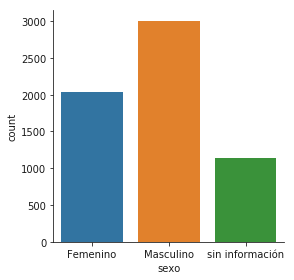

In [143]:
f = plt.figure(figsize=(15,12))
sns.factorplot(x='sexo', kind='count', data=personas);

In [144]:
def clean_sex(x,y):
    x = str(x)
    x = x.replace(' ','')
    if x == 'VAR':
        return 'Masculino'
    elif x == 'MUJ':
        return 'Femenino'
    else:
        return y

personas['sexo'] = [clean_sex(x,y) for x,y in zip(personas['Gender'].values, personas['sexo'].values)]

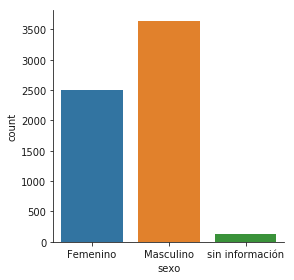

In [145]:
personas.sexo = personas.sexo.fillna('Sin Información')
sns.factorplot(x='sexo', kind='count', data=personas);

In [146]:
personas = personas.drop(['Gender'],axis=1)

In [147]:
print(personas.tipo_cliente.isnull().sum())
personas.tipo_cliente = personas.tipo_cliente.fillna('Natural')

87


# 5.Format Data

In [148]:
print(len(personas['rut'].unique()))
personas.shape

6184


(6270, 41)

In [149]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
personas.profesion.fillna('sin informacion', inplace=True)
personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')
personas['actividad'] = personas['actividad'].astype('category')

# personas = personas.dropna()

In [150]:
print(len(personas['rut'].unique()))
print(personas.shape)

6184
(6270, 41)


In [151]:
personas.head()

,actividad,compra,is_apellido1,is_apellido2,is_celular,is_descuento,is_direccion,is_fnac,is_nombre,is_nombrecompleto,...,profesion,rut,sexo,tipo_cliente,valid_rut,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,Profesional,False,True,False,True,False,False,True,True,True,...,Abogado,000.000.000-0,Femenino,Natural,True,0.0,1.0,1.0,0.0,0.0
1,Empleado,False,True,False,True,False,False,False,True,True,...,sin información,1.462.558-5,Masculino,Natural,True,0.0,0.0,0.0,1.0,0.0
2,Empleado,False,True,False,True,False,False,False,True,True,...,sin información,10.000.513-1,Masculino,Natural,True,0.0,0.0,0.0,0.0,2.0
3,Profesional,True,True,True,True,True,True,False,True,True,...,Médico,10.000.522-0,Masculino,Natural,True,0.0,0.0,0.0,0.0,2.0
4,sin información,False,True,True,True,False,False,False,True,True,...,sin información,10.005.853-7,Femenino,Natural,True,0.0,0.0,0.0,0.0,2.0


In [152]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6270 entries, 0 to 6269
Data columns (total 41 columns):
actividad               6183 non-null category
compra                  6183 non-null object
is_apellido1            6183 non-null object
is_apellido2            6183 non-null object
is_celular              6183 non-null object
is_descuento            6183 non-null object
is_direccion            6183 non-null object
is_fnac                 6183 non-null object
is_nombre               6183 non-null object
is_nombrecompleto       6183 non-null object
is_nrofam               6183 non-null object
is_presencial           6183 non-null object
is_profesion            6183 non-null object
is_recontacto           6183 non-null object
is_remoto               6183 non-null object
is_telefono             6183 non-null object
loc_comuna              6183 non-null category
loc_provincia           6183 non-null category
loc_region              6183 non-null category
max_rango_edad          6183 n

In [153]:
personas.dropna(axis=0, how='any', inplace=True)

In [154]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6182
Data columns (total 41 columns):
actividad               6183 non-null category
compra                  6183 non-null object
is_apellido1            6183 non-null object
is_apellido2            6183 non-null object
is_celular              6183 non-null object
is_descuento            6183 non-null object
is_direccion            6183 non-null object
is_fnac                 6183 non-null object
is_nombre               6183 non-null object
is_nombrecompleto       6183 non-null object
is_nrofam               6183 non-null object
is_presencial           6183 non-null object
is_profesion            6183 non-null object
is_recontacto           6183 non-null object
is_remoto               6183 non-null object
is_telefono             6183 non-null object
loc_comuna              6183 non-null category
loc_provincia           6183 non-null category
loc_region              6183 non-null category
max_rango_edad          6183 n

In [155]:
personas.to_csv('..\\..\\Datos\\experiments\\personas_cotizacion7.csv')
# personas.to_excel('..\\..\\Datos\\experiments\\personas_cotizacion7.xlsx')

In [84]:
# personas.info()
# g = sb.factorplot(x='sexo', col='proyecto', kind='count', data=personas);